# Introduction:
In this article,we will go through the tutorial for implementing KNN(K-nearest neighbour) algorithm using the Sklearn(a.k.a Scikit learn) library of Python.We will first look at the working of an KNN classifier followed by its features.Then we will move on to an illustration which will take you through an end to end classification problem in which we will classify genders as male or female based on certain facial features.




# What is K-nearest neighbour algorithm?
The KNN algorithm is a supervised machine learning algorithm.In supervised ML algorithms we train our model using our trainin data and our goal is to make our model predict an unlabeled or unseen data correctly.

KNN algorithm is also referred to as the lazy or non-parametric algorithm because here we do not use training points to generalize our model,which makes our training phase fast.We can start classifiying once we have our data ready,however,the drawback faced while using this algorithm is that entire training set must be kept in memory,which can be computationally expensive for larger datasets,as our algorithm will need to parse each and every data point to classify it,but for small ones KNN tends to work just fine without any issues.




# Points of consideration while implementing  KNN algorithm:

There are two major aspects that one must keep in mind while implementing KNN algorithm,the first on being the value of 'K' to be used.As the name of the algorithm itself suggests,deciding an appropriate K value is vital for our model building and while you can arbitrarily choose a 'K' value using trail and error methods,it is reccommended to carry out cross-validation in order to find an optimum value for K.The next point worth considering would be the distance metric we opt for in order to perform our classifications.
Numerous ways to compute distances exist.However the Euclidean distance and Cosine similarity are the most common ones used.







## Importing necessary libraries:
We first load the libraries required to build our model.

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

# Reading the csv file into Pandas:

In [2]:
df=pd.read_csv(r"C:\Users\Veer Kumar\Downloads\gender_classification_v7.csv")

In [3]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  4981 non-null   int64  
 1   forehead_width_cm          4981 non-null   float64
 2   forehead_height_cm         4981 non-null   float64
 3   nose_wide                  4981 non-null   int64  
 4   nose_long                  4981 non-null   int64  
 5   lips_thin                  4981 non-null   int64  
 6   distance_nose_to_lip_long  4981 non-null   int64  
 7   gender                     4981 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 291.9+ KB


In [5]:
df.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [6]:
df['gender'].value_counts()

Male      2492
Female    2489
Name: gender, dtype: int64

In [7]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


# The Dataset
we have 7 features in this dataset are :
Our dataset has 4981 rows and 7 columns

* long_hair : it will take 1 if he/she have a long hair or 0 if he/she haven't
* forehead_width_cm : forehead width in cm
* forehead_height_cm : forehead height in cm
* nose_long : it will take 1 if he/she have a long nose or 0 if he/she haven't
* nose_wide : it will take 1 if he/she have a wide nose or 0 if he/she haven't
* lips_thin : it will take 1 if he/she have a thin lips or 0 if he/she haven't
* distance_nose_to_lip_long : it will take 1 if there is a long distance between lips and nose or 0 if there isn't this long distance between them
* Gender(Target column):We will use the other 7 features of the dataset in order to make inferences and predictions regarding the gender of any given individual.

# Data Preprocessing:
Here,we will separate the feature and target matrix:

In [8]:
#preprocessing data
x = df.drop('gender', axis=1)
y = df['gender']

# Data Visualisation
After loading the dataset,we will visualize the correlation between different feautures present in our data set.Then,we will use a line plot to understand strongly(positvely) correlated features,followed by wekly correlated features and ultimately will look at negatively correlated features.

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'long_hair'),
  Text(1.5, 0, 'forehead_width_cm'),
  Text(2.5, 0, 'forehead_height_cm'),
  Text(3.5, 0, 'nose_wide'),
  Text(4.5, 0, 'nose_long'),
  Text(5.5, 0, 'lips_thin'),
  Text(6.5, 0, 'distance_nose_to_lip_long')])

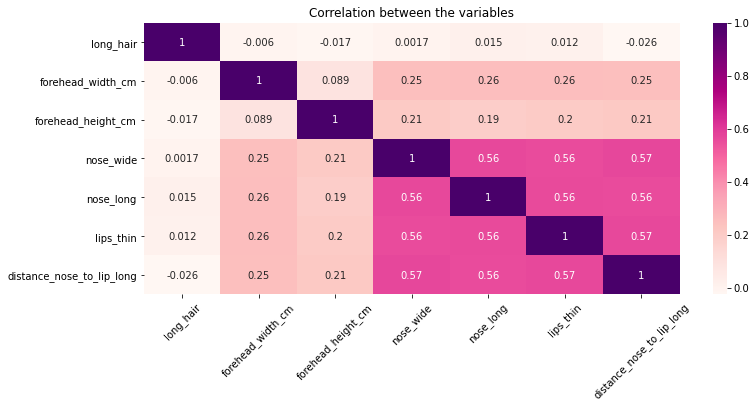

In [9]:
#correlation matrix and the heatmap
plt.subplots(figsize=(12,5))
gender_correlation=df.corr()
sns.heatmap(gender_correlation,annot=True,cmap='RdPu')
plt.title('Correlation between the variables')
plt.xticks(rotation=45)

<AxesSubplot:xlabel='distance_nose_to_lip_long', ylabel='lips_thin'>

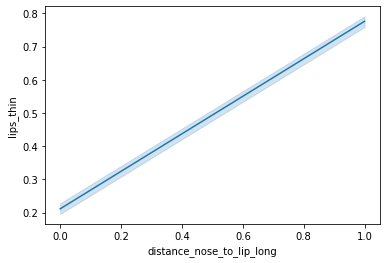

In [10]:
sns.lineplot(data=df, x="distance_nose_to_lip_long", y="lips_thin")

In the above lineplot,we observe that "lips_thin" and "distance_nose_to_lip_long" are positively correlated and they increase in almost a linear fashion.

<AxesSubplot:xlabel='forehead_width_cm', ylabel='forehead_height_cm'>

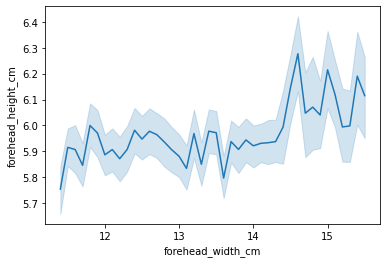

In [11]:
sns.lineplot(data=df, x="forehead_width_cm", y="forehead_height_cm")

In the above line plot,we observe a haphazard and jaggered graph,this shows that "forehead_width_cm" and "forehead_height_cm" cannot be correlated,since they have a very small positive corrleation,we cannot make any certain predictions by looking at this curve.

<AxesSubplot:xlabel='long_hair', ylabel='forehead_width_cm'>

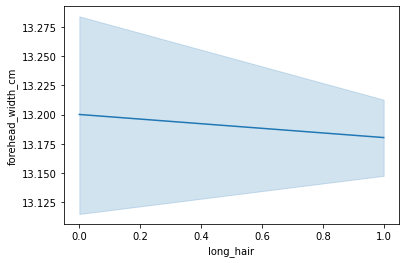

In [12]:
sns.lineplot(data=df, x="long_hair", y="forehead_width_cm")

In this lineplot,presented above we see an example of negative correlation as can be observed from the negative slope when plotting quantities such as "long_hair" and "forehead_width_cm".

# Comparing Male and Female Nose Width:
Here,we will compare an important feature called "nose_wide" that can be used to distinctly identify male from female or vice-versa.

In [13]:
males = df.query(" gender == 'Male' ")
males.groupby('nose_wide')['nose_wide'].describe()


,count,mean,std,min,25%,50%,75%,max
nose_wide,,,,,,,,
0,316.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2176.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


 2176 males have a wide nose thaT means roughly 87% of males have this wide nose and just 316 males dont have a wide nose .

<AxesSubplot:xlabel='nose_wide', ylabel='Count'>

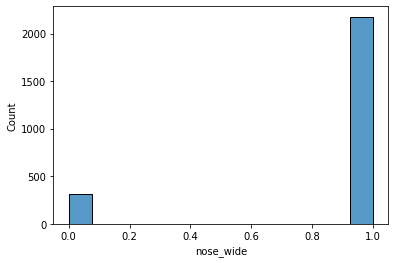

In [14]:
sns.histplot(data = males , x = 'nose_wide')

In [15]:
females = df.query(" gender == 'Female' ")
females.groupby('nose_wide')['nose_wide'].describe()


,count,mean,std,min,25%,50%,75%,max
nose_wide,,,,,,,,
0,2202.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,287.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


Here we see that 2202 females do not have a wide nose,while 287 have a wide nose.This means rougly 88% of women do not have wide nose,which is a big difference from characteristics displayed by males for the  same feature.

<AxesSubplot:xlabel='nose_wide', ylabel='Count'>

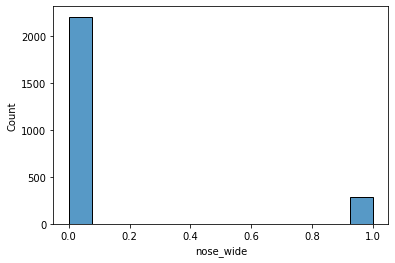

In [16]:
sns.histplot(data = females , x = 'nose_wide')

# Splitting dataset into Training and Testing set:
We split training and testing sets with the help of train_test_split() function

In [17]:
#splitting the dataset
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=100)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix

### Model fitting and  K-cross Validation using GridSearchCV:
We first create a KNN classifier and then perform K-cross validation by passing hyperparameter tuning metrics such as 'K' in order to find optimum numbe rof nearest neighbours,we set our cross validation batch sizes and set our scoring metric as per our preferrence.



In [19]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range

  
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(x_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   22.6s finished


These are the optimal parameters obtained after performing gridsearch:

In [24]:
print(grid_search.best_params_)

{'n_neighbors': 26}


In [20]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 97.64%


# Finding Test-Model Accuracy:
Test model accuracy will tell us about how well our model generalized on the training data,on the basis of predicting values for unseen data.

In [21]:
y_test_hat=grid.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_hat)*100
test_accuracy
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 96.49%


# Plotting a Confusion Matrix:
Now we evaluate the model using the testing data,for this purpose we set up a confusion matrix to help us in finding out true postives,true negatives,false positives and false negatives.

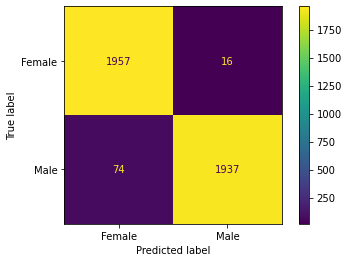

In [22]:
plot_confusion_matrix(grid,x_train, y_train,values_format='d' )

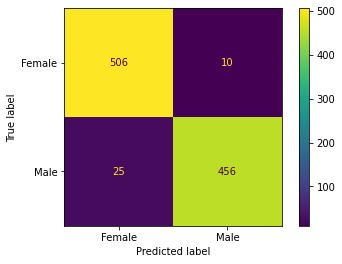

In [23]:
plot_confusion_matrix(grid,x_test, y_test,values_format='d' )

# Conclusion

We Hope you liked our tutorial and now better understand how to implement K-nearest neigbour(KNN) algorithm using Sklearn(Scikit Learn) in Python.Here,we have illustrated an end-to-end example of using a dataset to build an KNN model in order to classify our datapoints into their respective genders making use of the  KNeighborsClassifier module.